<a id="top"> </a>
# ToC
+ [1. Functions](#functions)
+ [2. Day1](#day1)
+ [3. KNN](#knn)
+ [4. Decision Tree](#dec_tree)
    + [4.1 Decission Tree Classification](#dec_tree_class)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [3]:
data_churn = pd.read_csv("../data/data_customer-churn.csv")

In [4]:
data_cust = pd.read_csv("../data/cleaned_cust_data.csv")

<a id="functions"></a>
## 1. Functions

In [5]:
def snake_case_columns(col_names:[list]=None):
    # __author__ = "Roman Kaltschew"
    """changes all columns to snake_case (from CamelCase)"""
    if not col_names or type(col_names) != list:
        print("No list of column names provided")
        return None
    new_cols = []
    for col in col_names:
        this_col = col[0].lower()
        for _ in col[1:]:
            if _.isupper():
                this_col += f"_{_.lower()}"
            else:
                this_col += _
        new_cols.append(this_col)
    return new_cols

In [6]:
def nan_values_of_all_columns(this_df, return_dict:[bool] = False):
    # __author__ = "Roman Kaltschew"
    """prints (defaults) or returns dictionary of all columns in this_df and their respective nan-values"""
    if not return_dict:
        for col in this_df.columns:
            print(col, this_df[col].isna().sum())
        return
    return {col:this_df[col].isna().sum() for col in this_df.columns}

In [7]:
def x_y_to_1_0(value:[str]=None, x="Yes", y="No", return_none:[bool]=True):
    # __author__ = "Roman Kaltschew"
    """changes the value from x-value to 1 and y-value to 0, returns None if True and value is neither x or y"""
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        if return_none:
            return None


In [8]:
def split_column_names_by(this_df, include_dtypes:[list]=["int","float"]):
    # __author__ = "Roman Kaltschew"
    """takes in this_df, splits this_df's columns into two lists of column name by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_lst, excl_lst)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (incl_lst, excl_lst)

In [9]:
def nan_values_of_all_columns(this_df, return_dict:[bool] = False):
    # __author__ = "Roman Kaltschew"
    """prints (defaults) or returns dictionary of all columns in this_df and their respective nan-values"""
    if not return_dict:
        for col in this_df.columns:
            print(col, this_df[col].isna().sum())
        return
    return {col:this_df[col].isna().sum() for col in this_df.columns}

In [10]:
def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

**project specific**

In [11]:
def preprocessing(this_df):
    # __author__ = "Roman Kaltschew"    
    """Project Specific, following instructions from LabWorks Week7 day2"""
    # snake case for all columns
    this_df.columns = snake_case_columns(list(this_df.columns))
    this_df.rename(columns={'streaming_t_v': 'streaming_tv'}, inplace=True)
    # drop the " " from total_charges
    this_df = this_df[this_df.total_charges != " "]
    # change total_charges to float64
    this_df["total_charges"] = this_df["total_charges"].astype("float64")
    # return only relevant columns
    return this_df[["tenure", "senior_citizen", "monthly_charges", "total_charges", "churn"]]

In [12]:
"""
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
churnData['Churn']= label_encoder.fit_transform(churnData['Churn'] ) 
churnData.head(2)
"""

"\nfrom sklearn import preprocessing \nlabel_encoder = preprocessing.LabelEncoder()\nchurnData['Churn']= label_encoder.fit_transform(churnData['Churn'] ) \nchurnData.head(2)\n"

[top](#top)

## Placehodler Day 1

<a id= "knn"></a>
## 3. KNN

### Classification Problem

In [13]:
data = preprocessing(data_churn)
data

tenure  senior_citizen  monthly_charges  total_charges churn
0          1               0            29.85          29.85    No
1         34               0            56.95        1889.50    No
2          2               0            53.85         108.15   Yes
3         45               0            42.30        1840.75    No
4          2               0            70.70         151.65   Yes
...      ...             ...              ...            ...   ...
7038      24               0            84.80        1990.50    No
7039      72               0           103.20        7362.90    No
7040      11               0            29.60         346.45    No
7041       4               1            74.40         306.60   Yes
7042      66               0           105.65        6844.50    No

[7032 rows x 5 columns]

In [14]:
X = data.drop(["churn"], axis=1)
y = (data["churn"])

Error_metric     Train      Test
0     Accuracy  0.793778  0.780384
1    Precision  0.658768  0.624521
2       Recall  0.464883  0.435829

Confusion matrix for the train set
[[3770  360]
 [ 800  695]]


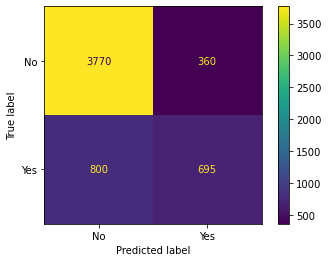



Confusion matrix for the test set
[[935  98]
 [211 163]]


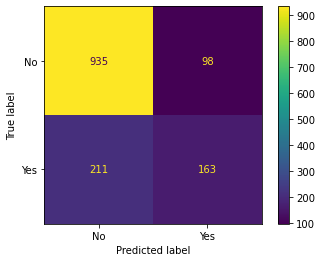

In [15]:
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

<a id = "dec_tree"></a>
## 4. Decision Tree

<a id = "dec_tree_class"></a>
### 4.1 Classification

#### 4.1.1 Using only the four numerical columns from LabWorks description
(week 7, day 2)

In [51]:
data_ = preprocessing(data_churn)

In [52]:
X = data_.drop(columns=["churn"], axis = 1)
y = data_["churn"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Compare different levels of depth**

In [54]:
compare_performance_df = pd.DataFrame()

for depth in range(2,8):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                             recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                            recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)

In [55]:
# compare_performance_df
compare_performance_df.sort_values(["error_metric", "depth"], ascending = (True, True)) # sorted by error_metric and depth

depth error_metric  train  test
0      2     Accuracy   0.79  0.77
0      3     Accuracy   0.79  0.77
0      4     Accuracy   0.80  0.78
0      5     Accuracy   0.80  0.77
0      6     Accuracy   0.81  0.77
0      7     Accuracy   0.82  0.77
1      2    Precision   0.66  0.61
1      3    Precision   0.66  0.61
1      4    Precision   0.67  0.62
1      5    Precision   0.68  0.61
1      6    Precision   0.70  0.60
1      7    Precision   0.72  0.60
2      2       Recall   0.42  0.40
2      3       Recall   0.42  0.40
2      4       Recall   0.47  0.44
2      5       Recall   0.47  0.43
2      6       Recall   0.51  0.45
2      7       Recall   0.52  0.45

#### 4.1.2 Use depth of 4, include confusion matrices and tree plot
changing from 3 to 4 results in a jump in **recall score** of test set by **+4 %**

In [56]:
X = data_.drop(columns=["churn"], axis = 1)
y = data_["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

error_metric  train  test
0     Accuracy   0.80  0.78
1    Precision   0.67  0.62
2       Recall   0.47  0.44

Confusion matrix for the train set


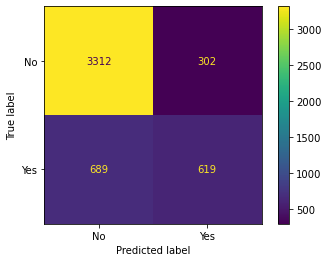

Confusion matrix for the test set


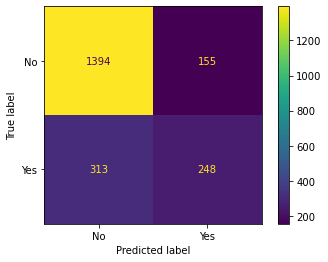

Tree plot


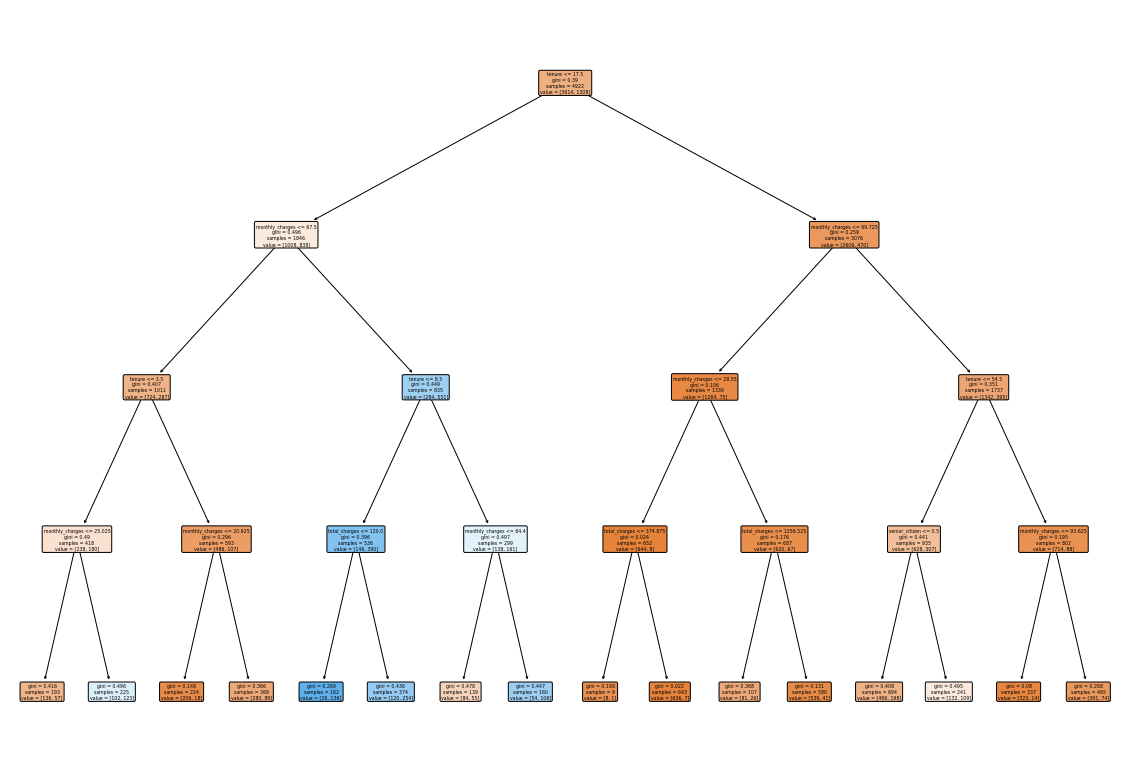

In [57]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

performance_df = pd.DataFrame({'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")

plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print("Confusion matrix for the test set")

plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14))

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

#### 4.1.3 include categorical columns from original dataset

In [58]:
data_ = data_churn.copy()

In [59]:
# remove " " values from total_charge and set type as float
data_ = data_[data_.total_charges != " "]
data_["total_charges"] = data_["total_charges"].astype("float64")


In [60]:
X = data_.drop(columns=["churn"], axis = 1)
y = data_["churn"]


In [61]:
categoricals_features= X.select_dtypes("object")
cat_cols=pd.get_dummies(categoricals_features, drop_first=True)
cat_cols

gender_Male  partner_Yes  dependents_Yes  phone_service_Yes  \
0               0            1               0                  0   
1               1            0               0                  1   
2               1            0               0                  1   
3               1            0               0                  0   
4               0            0               0                  1   
...           ...          ...             ...                ...   
7038            1            1               1                  1   
7039            0            1               1                  1   
7040            0            1               1                  0   
7041            1            1               0                  1   
7042            1            0               0                  1   

      online_security_No internet service  online_security_Yes  \
0                                       0                    0   
1                                       0                    1   
2                                       0                    1   
3                                       0                    1   
4                                       0                    0   
...                                   ...                  ...   
7038                                    0                    1   
7039                                    0                    0   
7040                                    0                    1   
7041                                    0                    0   
7042                                    0                    1   

      online_backup_No internet service  online_backup_Yes  \
0                                     0                  1   
1                                     0                  0   
2                                     0                  1   
3                                     0                  0   
4                                     0                  0   
...                                 ...                ...   
7038                                  0                  0   
7039                                  0                  1   
7040                                  0                  0   
7041                                  0                  0   
7042                                  0                  0   

      device_protection_No internet service  device_protection_Yes  \
0                                         0                      0   
1                                         0                      1   
2                                         0                      0   
3                                         0                      1   
4                                         0                      0   
...                                     ...                    ...   
7038                                      0                      1   
7039                                      0                      1   
7040                                      0                      0   
7041                                      0                      0   
7042                                      0                      1   

      tech_support_No internet service  tech_support_Yes  \
0                                    0                 0   
1                                    0                 0   
2                                    0                 0   
3                                    0                 1   
4                                    0                 0   
...                                ...               ...   
7038                                 0                 1   
7039                                 0                 0   
7040                                 0                 0   
7041                                 0                 0   
7042                                 0                 1   

      streaming_tv_No internet service  streaming_tv_Yes  \
0                

In [62]:
X = X._get_numeric_data()
X = pd.concat([X,cat_cols],axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

error_metric  train  test
0     Accuracy   0.79  0.77
1    Precision   0.66  0.61
2       Recall   0.42  0.40

Confusion matrix for the train set


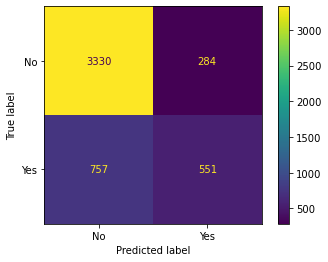

Confusion matrix for the test set


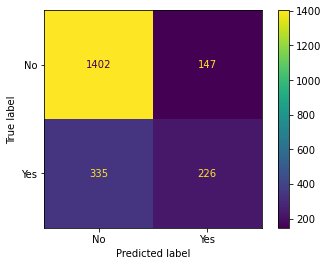

Tree plot


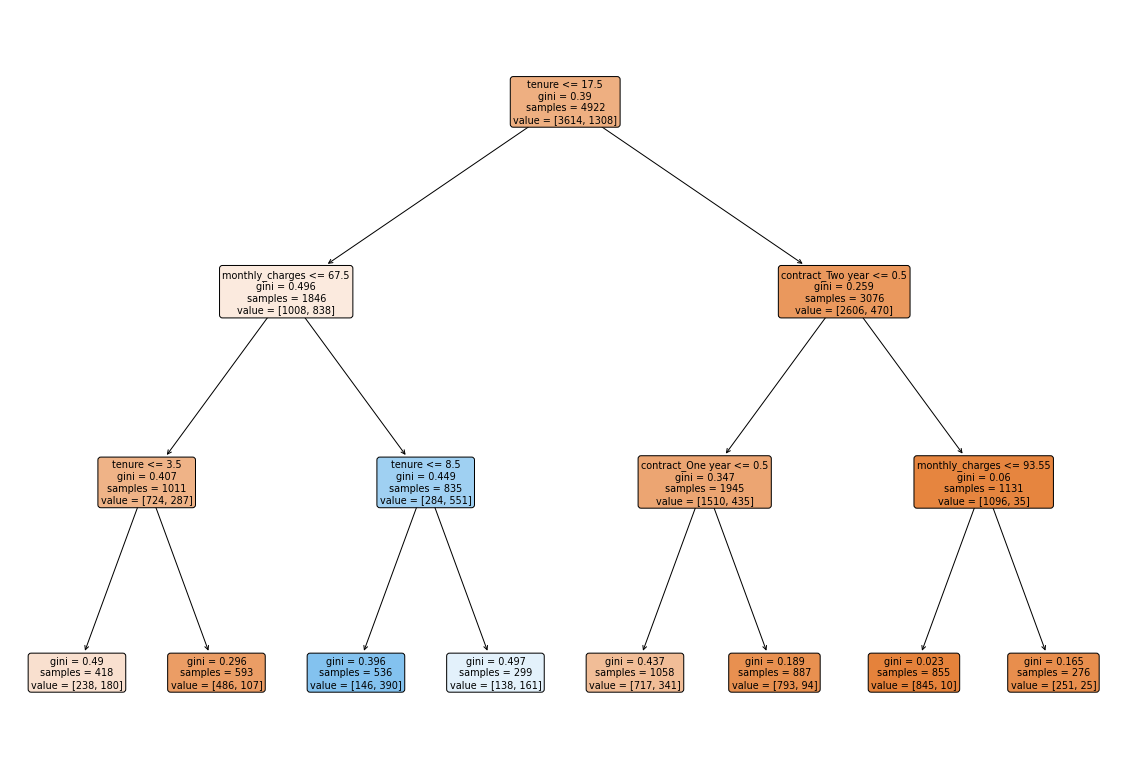

In [64]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

performance_df = pd.DataFrame({'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")

plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print("Confusion matrix for the test set")

plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14))

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

<a id = "dec_tree_linreg"></a>
### 4.2 Decision Tree LinearRegression

In [65]:
data_ = data_cust.copy()

In [66]:
data_ = data_._get_numeric_data()
# data_

In [67]:
X = data_.drop(columns=["total_claim_amount"], axis = 1)
y = data_["total_claim_amount"]

In [68]:
#X = X._get_numeric_data()
# X

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [70]:
model = DecisionTreeRegressor(max_depth=3)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

Error_metric    Train     Test
0                      Mean error     0.00     2.77
1             Mean absolute error   151.63   152.43
2              Mean squared error 42003.78 40254.75
3         Root mean squared error   204.95   200.64
4  Mean absolute percentual error      inf      inf
5                              R2     0.51     0.51

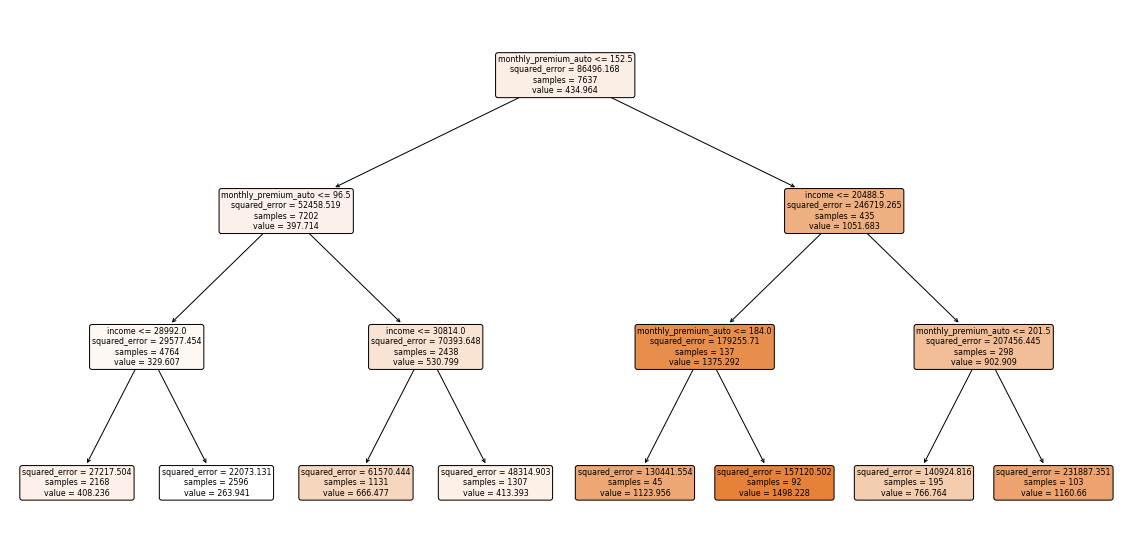

In [71]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True, feature_names = X.columns)
plt.show()  